In [12]:
import pandas as pd
encodings = ["utf-8", "ISO-8859-1", "windows-1252"]
for encoding in encodings:
  try:
    data = pd.read_csv("/content/spam.csv", encoding=encoding)
    break
  except UnicodeDecodeError:
    pass

if "data" in locals():
  print("Successfully read the CSV using", encoding)
else:
  print("Failed to read the CSV using common encodings.")

Successfully read the CSV using ISO-8859-1


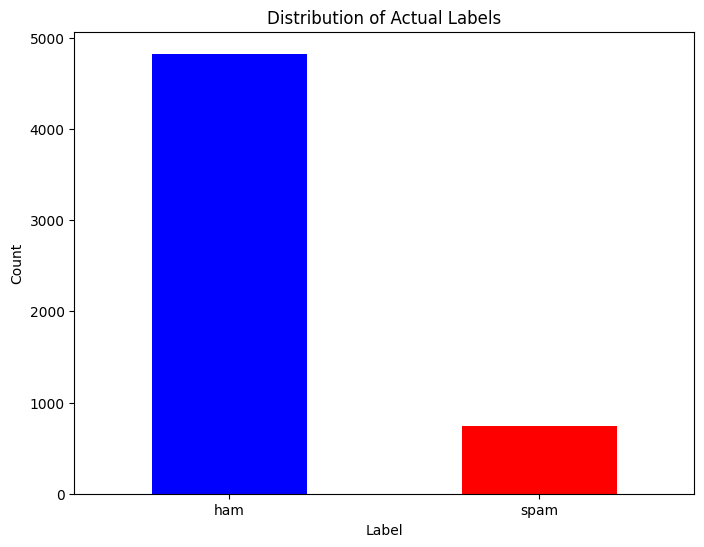

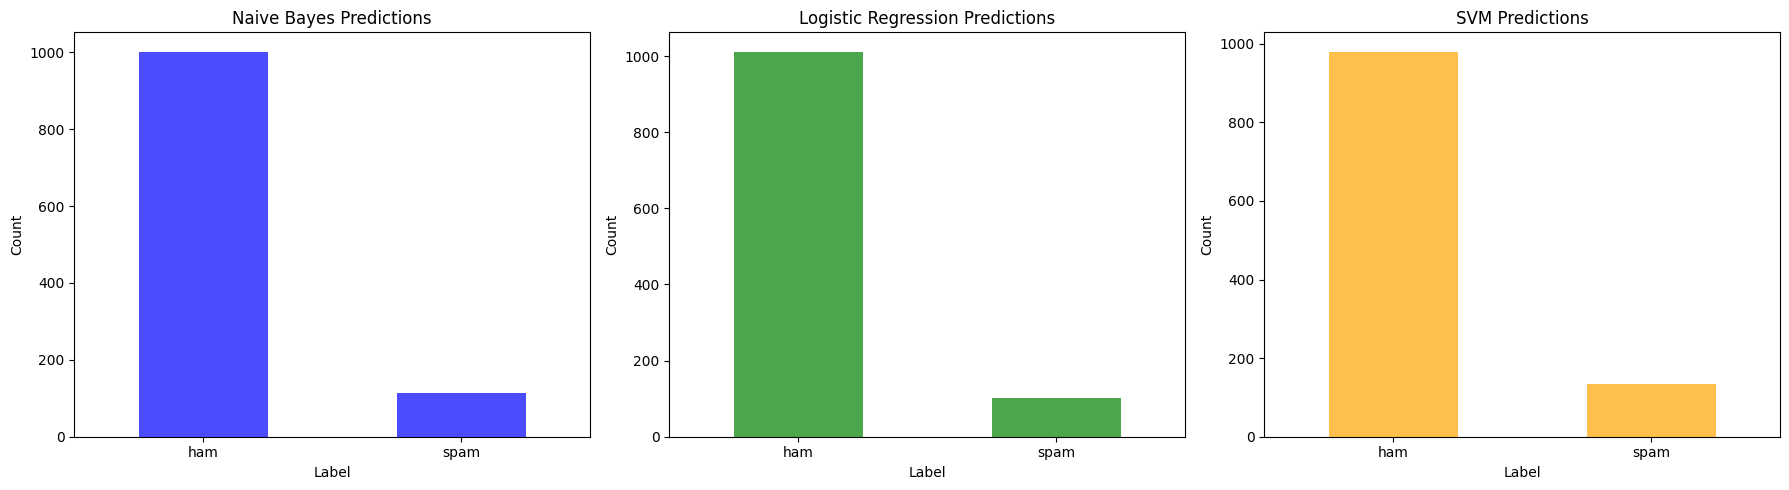

Naive Bayes Accuracy: 0.9668161434977578
Logistic Regression Accuracy: 0.9524663677130045
SVM Accuracy: 0.979372197309417


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')
label_counts = df['v1'].value_counts()
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Actual Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

nb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=1000)
svm_model = SVC(kernel='linear')

nb_model.fit(X_train_tfidf, y_train)
lr_model.fit(X_train_tfidf, y_train)
svm_model.fit(X_train_tfidf, y_train)

y_pred_nb = nb_model.predict(X_test_tfidf)
y_pred_lr = lr_model.predict(X_test_tfidf)
y_pred_svm = svm_model.predict(X_test_tfidf)

nb_counts = pd.Series(y_pred_nb).value_counts()
lr_counts = pd.Series(y_pred_lr).value_counts()
svm_counts = pd.Series(y_pred_svm).value_counts()
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
nb_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Naive Bayes Predictions')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['ham', 'spam'], rotation=0)

plt.subplot(1, 3, 2)
lr_counts.plot(kind='bar', color='green', alpha=0.7)
plt.title('Logistic Regression Predictions')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['ham', 'spam'], rotation=0)

plt.subplot(1, 3, 3)
svm_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('SVM Predictions')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['ham', 'spam'], rotation=0)

plt.tight_layout()
plt.show()

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))